In [1]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, root_mean_squared_error
import sklearn.svm as svm
import sklearn.tree as tree

import tpot

import matplotlib.pyplot as plt

from tqdm import tqdm

import pandas as pd
import numpy as np

import joblib




c:\Users\Acer\miniconda3\envs\deep\lib\site-packages\tpot\builtins\__init__.py:36: UserWarning: Warning: optional dependency `torch` is not available. - skipping import of NN models.
  warnings.warn("Warning: optional dependency `torch` is not available. - skipping import of NN models.")


In [2]:
# Preparing the dataset and creating the features and target arrays

n_sims = 10000

x = []
y = []

for i in tqdm(range(n_sims), desc='Carregando dados', ascii=True):
    data = np.load(f'input/data_{i+1}.npy')
    x.append(data[:, 1])
    y.append(data[0, 2])  # equivalente a data[:, 2:][0][0]

x = np.array(x)


y = np.array(y)

norm = y.max()
# Normalização
y /= y.max()


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.25)

Carregando dados: 100%|##########| 10000/10000 [00:03<00:00, 2901.55it/s]


In [57]:
x.shape

(100, 80)

In [17]:
from sklearn.inspection import permutation_importance

In [18]:
model = svm.NuSVR()

model.fit(x_train, y_train)


NuSVR()

In [19]:
r = permutation_importance(model, x, y,

                           n_repeats=30,

                           random_state=0)

In [61]:
for i in r.importances_mean.argsort()[::-1]:

    if r.importances_mean[i] - 2 * r.importances_std[i] > 0:

        print(f"{r.importances_mean[i]:.3f}"  f" +/- {r.importances_std[i]:.3f}")


0.006 +/- 0.001
0.006 +/- 0.001
0.006 +/- 0.001
0.006 +/- 0.001
0.006 +/- 0.001
0.006 +/- 0.001
0.006 +/- 0.001
0.006 +/- 0.001
0.006 +/- 0.001
0.006 +/- 0.001
0.005 +/- 0.000
0.005 +/- 0.000
0.005 +/- 0.000
0.005 +/- 0.000
0.005 +/- 0.000
0.005 +/- 0.000
0.005 +/- 0.000
0.005 +/- 0.000
0.005 +/- 0.000
0.004 +/- 0.000
0.004 +/- 0.000
0.004 +/- 0.000
0.004 +/- 0.000
0.004 +/- 0.000
0.004 +/- 0.000
0.004 +/- 0.000
0.004 +/- 0.000
0.004 +/- 0.000
0.003 +/- 0.000
0.003 +/- 0.000
0.003 +/- 0.000
0.003 +/- 0.000
0.003 +/- 0.000
0.003 +/- 0.000
0.003 +/- 0.000
0.003 +/- 0.000
0.003 +/- 0.000
0.003 +/- 0.000
0.002 +/- 0.000
0.002 +/- 0.000
0.002 +/- 0.000
0.002 +/- 0.000
0.002 +/- 0.000
0.002 +/- 0.000
0.002 +/- 0.000
0.002 +/- 0.000
0.002 +/- 0.000
0.002 +/- 0.000
0.001 +/- 0.000
0.001 +/- 0.000
0.001 +/- 0.000
0.001 +/- 0.000
0.001 +/- 0.000
0.001 +/- 0.000
0.001 +/- 0.000
0.001 +/- 0.000
0.001 +/- 0.000
0.001 +/- 0.000
0.001 +/- 0.000
0.001 +/- 0.000
0.001 +/- 0.000
0.001 +/- 0.000
0.001 +/

In [20]:


def plot_topN_permutation_importance(perm_result, feature_names, N=10):
    """
    Plot top 10 permutation importance features as vertical bars.
    
    Parameters:
    -----------
    perm_result : dict or sklearn.inspection permutation importance result
        Result object from permutation_importance() call.
        Should have attributes: importances_mean, importances_std
    feature_names : list or array
        Names of the features corresponding to the importance values
    title : str, optional
        Title for the plot (default: "Top 10 Feature Importance")
    """
    # Extract mean and std from the permutation result
    if hasattr(perm_result, 'importances_mean'):
        # sklearn >= 0.22 style object
        importance_mean = perm_result.importances_mean
        importance_std = perm_result.importances_std
    else:
        # Older style dictionary result
        importance_mean = perm_result['importances_mean']
        importance_std = perm_result['importances_std']
    
    # Get top 10 features
    top10_indices = np.argsort(importance_mean)[-N:][::-1]  # Indices of top 10, sorted descending
    top10_mean = importance_mean[top10_indices]
    top10_std = importance_std[top10_indices]
    top10_names = np.array(feature_names)[top10_indices]
    
    # Create plot
    plt.figure(figsize=(10, 6))
    x_pos = np.arange(len(top10_names))
    
    plt.bar(x_pos, top10_mean, yerr=top10_std, align='center', alpha=0.8, color='steelblue')
    plt.xticks(x_pos, top10_names, rotation=45, ha='right')
    plt.ylabel('Permutation Importance Score')
    plt.title(f"Top {N} Feature Importance")
    
    # Add value labels on top of each bar
    for i, v in enumerate(top10_mean):
        plt.text(i, v + 0.01 * max(top10_mean), f"{v:.3f}", ha='center')
    
    plt.tight_layout()
    plt.show()

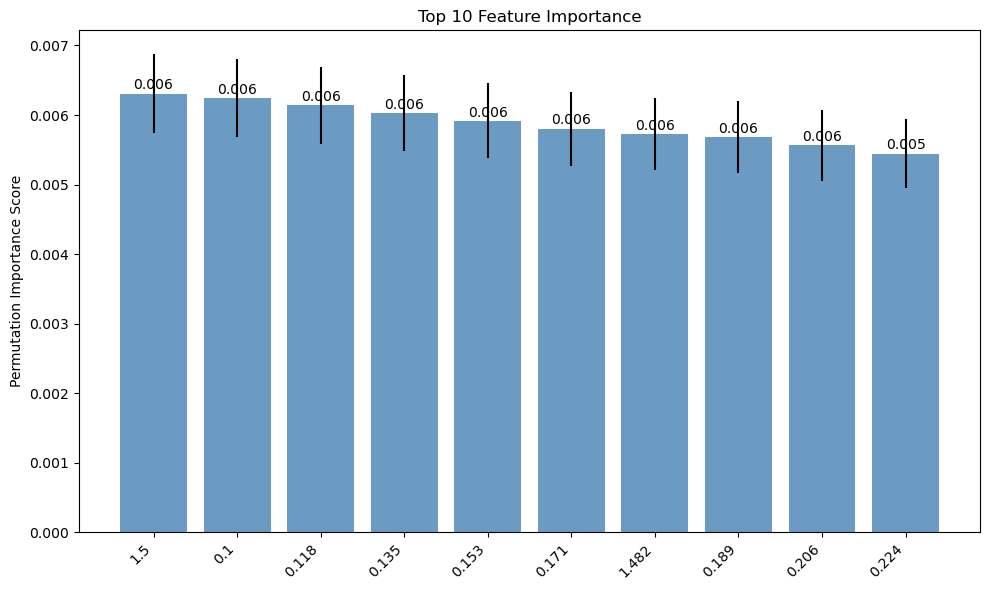

In [21]:
plot_topN_permutation_importance(r, np.round(np.linspace(0.1, 1.5, 80), 3), N=10)

In [18]:
model = svm.NuSVR()

model.fit(x_train, y_train)


NuSVR()

In [3]:
reg = tpot.TPOTRegressor(max_time_mins=1)


In [15]:
reg.fit(x_train, y_train)

Version 0.12.2 of tpot is outdated. Version 1.0.0 was released Wednesday February 26, 2025.


TPOTRegressor(max_time_mins=1)

In [16]:
y_pred = reg.predict(x_test)


r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)

r2

0.9999999706666444

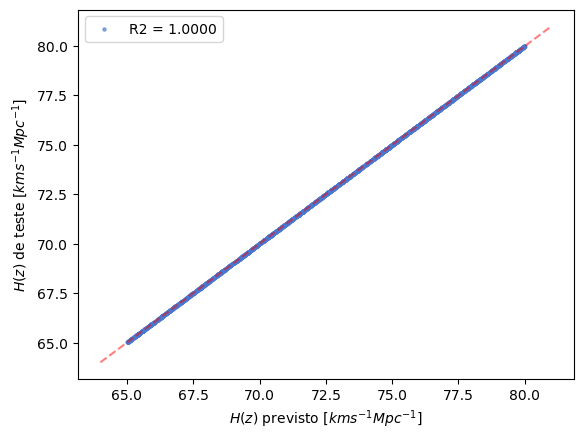

In [17]:
plt.style.use('seaborn-v0_8-muted')

linha = np.linspace(64, 81)
# linha = np.linspace(.31, .315, 2500)


plt.scatter(y_pred*norm, y_test*norm, s=5, alpha=.6, label=f'R2 = {r2:.4f}')
plt.plot(linha, linha, alpha=.5, c='red', ls='--')

plt.legend()


plt.xlabel(r'$H (z)$ previsto [$km s^{-1} Mpc^{-1}$] ')
plt.ylabel(r'$H (z)$ de teste [$km s^{-1} Mpc^{-1}$] ')

# plt.savefig("imagens/metrics_h0_tpot")
plt.show()

In [20]:
# forecasting "real" H(0)

real = np.load('input/data_real80.npy')
real = real[real[:, 1].argsort()]

# real = real.reshape(1, 80)

In [21]:

final_real = reg.predict(real[:, 1].reshape(1, -1))
final_real*norm

array([67.4492563])

In [30]:
def permutation_importance_sklearn(model, X_test, y_test, metric=mean_squared_error, n_repeats=1):
	"""
	Calcula a importância de cada feature via permutação (compatível com modelos scikit-learn).
	"""
	base_pred = model.predict(X_test)
	base_score = metric(y_test, base_pred)

	importances = np.zeros(X_test.shape[1])

	for feature_idx in range(X_test.shape[1]):
		scores = []
		for _ in range(n_repeats):
			X_permuted = X_test.copy()
			np.random.shuffle(X_permuted[:, feature_idx])
			perm_pred = model.predict(X_permuted)
			perm_score = metric(y_test, perm_pred)
			scores.append(perm_score)
		importances[feature_idx] = np.mean(scores) - base_score

	return importances


def plot_feature_importance_colored_sk(importances):
	"""
	Plota a importância das features com coloração baseada na magnitude.
	"""
	features = np.arange(len(importances))  # Índices das features
	
	# Normaliza a importância para mapear nas cores
	norm = plt.Normalize(min(importances), max(importances))
	cmap = plt.cm.viridis
	colors = cmap(norm(importances))

	fig, ax = plt.subplots(figsize=(14, 5))
	bars = ax.bar(features, importances, width=0.6, color=colors, edgecolor='black')

	# Adiciona a colorbar
	sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
	sm.set_array([])
	cbar = fig.colorbar(sm, ax=ax)
	cbar.set_label('Importância relativa', fontsize=14)

	ax.set_title('Permutation Importance', fontdict={'fontsize':14})
	ax.set_xlabel('Redshift (z)', fontdict={'fontsize':14})
	ax.set_ylabel('Queda de desempenho', fontdict={'fontsize':14})
	# ax.set_xticks(np.linspace(.1, 1.5, 7), np.round(np.linspace(.1, 1.5, 7), 2))
	ax.grid(axis='y', linestyle='--', alpha=0.6)
	
	plt.xticks(np.linspace(1, 80, 8), np.round(np.linspace(.1, 1.5, 8), 2))

	plt.tight_layout()
	plt.show()

In [26]:
importances = permutation_importance_sklearn(reg, x, y)


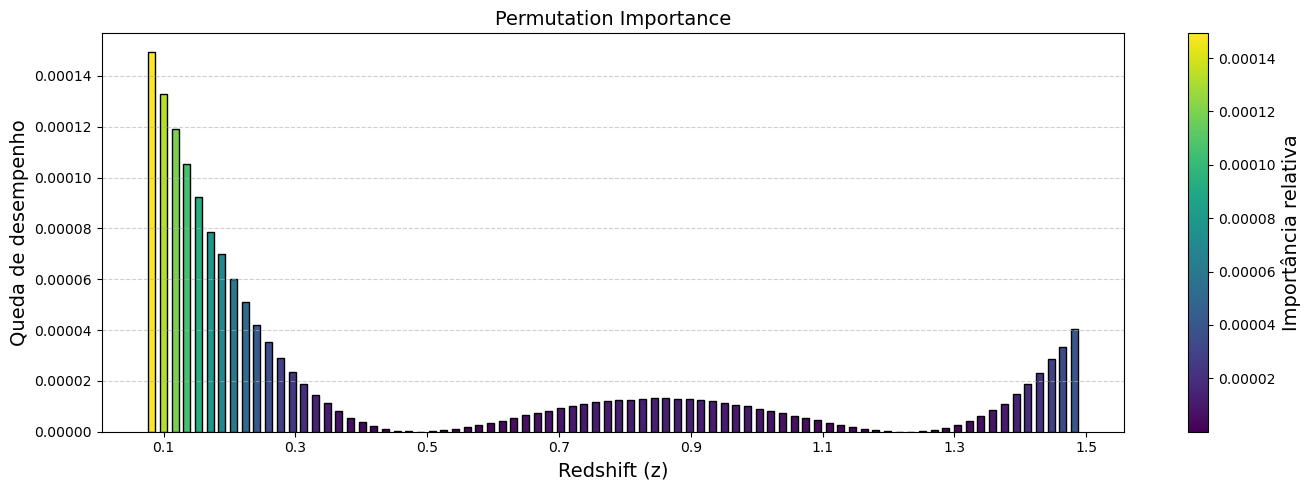

In [31]:
plot_feature_importance_colored_sk(importances)

In [32]:
y_pred = model.predict(x_test)


r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)


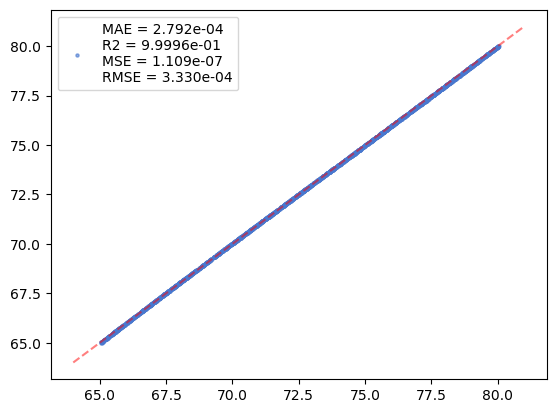

In [33]:
plt.style.use('seaborn-v0_8-muted')

linha = np.linspace(64, 81)


plt.scatter(y_pred*norm, y_test*norm, s=5, alpha=.6, label=f'MAE = {mae:.3e}\nR2 = {r2:.4e}\nMSE = {mse:.3e}\nRMSE = {rmse:.3e}')
plt.plot(linha, linha, alpha=.5, c='red', ls='--')

plt.legend()
plt.savefig("imagens/metrics_h0_tree")

plt.show()

In [34]:
# forecasting "real" H(0)

real = np.load('input/data_real80.npy')
real = real[real[:, 1].argsort()]

real = real.reshape(1, 160)

In [35]:

final_real = model.predict(real)

In [36]:
final_real*norm

array([67.43835969])

In [37]:
x_test.shape

(2500, 160)

In [38]:
import joblib


joblib.dump(model, "models/svm.pkl") 

['models/svm.pkl']